# Construction of a wild strawberry PDC expression vector for *Saccharomyces cerevisiae*


This [Jupyter notebook](http://jupyter.org/index.html) describes the cloning of the [strawberry](https://en.wikipedia.org/wiki/Strawberry) Fragaria × ananassa  alcohol acyltransferase [SAAT](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC139918/) gene and the construction of a *[S. cerevisiae](https://en.wikipedia.org/wiki/Saccharomyces_cerevisiae)* expression vector for this gene.

The SAAT gene is involved in the production of the strawberry fragrance. It is necessary to first produce cDNA which  is not decribed in this notebook. Here is a [recent protocol](https://www.ncbi.nlm.nih.gov/pubmed/24321691) for the extraction of nucleic acids from Strawberry.

In [1]:
import os
os.environ["pydna_cache"] = "nocache"

In [2]:
# Import the pydna package
import pydna 

In [6]:
# give an email address to Genbank
gb=pydna.Genbank("bjornjobb@gmail.com")
# download the SAAT CDS from Genbank
saat = gb.nucleotide("AF193791 REGION: 78..1895")
saat

Genbank(AF193791.1)(-1818)

In [7]:
# design two new primers for SAAT
fw, rv = pydna.cloning_primers(saat, fp_tail="aa")

In [10]:
fw

Primer(seq=Seq('aaATGGACACCAAGATTG', IUPACAmbiguousDNA()), id='fw1818', name='fw1818', description='fw1818 AF193791.1', dbxrefs=[])

In [11]:
rv

Primer(seq=Seq('TTACTGAGGATTAGGTGG', IUPACAmbiguousDNA()), id='rv1818', name='rv1818', description='rv1818 AF193791.1', dbxrefs=[])

In [13]:
# amplify SAAT with new primers
saat_pcr_prod = pydna.pcr(fw, rv, saat)
saat_pcr_prod

Amplicon(1820)

In [15]:
# read the cloning vector from a local file
pYPKa=pydna.read("pYPKa.gb")
pYPKa

File(pYPKa)(o3128)

In [16]:
# import the restriction enzyme AjiI from Biopython
from Bio.Restriction import AjiI

In [17]:
# cut the vector
pYPKa_AjiI = pYPKa.linearize(AjiI)

In [18]:
pYPKa_AjiI

Dseqrecord(-3128)

In [19]:
# clone the PCR product
pYPKa_A_saat = ( pYPKa_AjiI + saat_pcr_prod ).looped()
pYPKa_A_saat

Dseqrecord(o4948)

In [ ]:
# read promoter vector
pYPKa_Z_prom = pydna.read("pYPKa_Z_TEF1.gb")
# read terminator vector
pYPKa_E_term = pydna.read("pYPKa_E_TPI1.gb")

In [23]:
pYPKa_Z_prom, pYPKa_E_term

(File(-)(o3721), File(-)(o3724))

In the cell below, primers relevant to the [Yeast Pathway Kit](http://pubs.acs.org/doi/abs/10.1021/acssynbio.5b00250) are read into six sequence objects. These are similar to the ones created in cell [3]

In [24]:
# Standard primers
p567,p577,p468,p467,p568,p578  =  pydna.parse_primers('''

>567_pCAPsAjiIF (23-mer)
GTcggctgcaggtcactagtgag
>577_crp585-557 (29-mer)
gttctgatcctcgagcatcttaagaattc

>468_pCAPs_release_fw (25-mer)
gtcgaggaacgccaggttgcccact
>467_pCAPs_release_re (31-mer) 
ATTTAAatcctgatgcgtttgtctgcacaga

>568_pCAPsAjiIR (22-mer) 
GTGCcatctgtgcagacaaacg
>578_crp42-70 (29-mer)
gttcttgtctcattgccacattcataagt''')

In [25]:
# Promoter amplified using p577 and p567
p = pydna.pcr(p577, p567, pYPKa_Z_prom)

In [26]:
# Gene amplified using p468 and p467
g = pydna.pcr(p468, p467, pYPKa_A_saat)

In [27]:
# Terminator amplified using p568 and p578
t = pydna.pcr(p568, p578, pYPKa_E_term)

In [28]:
# Yeast backbone vector read from a local file
pYPKpw = pydna.read("pYPKpw.gb")

In [29]:
from Bio.Restriction import ZraI

In [30]:
# Vector linearized with ZraI
pYPKpw_lin = pYPKpw.linearize(ZraI) 

In [31]:
# Assembly simulation between four linear DNA fragments:
# plasmid, promoter, gene and terminator
# Only one circular product is formed (8769 bp)
asm = pydna.Assembly( (pYPKpw_lin, p, g, t) )

In [32]:
# Inspect the only circular product
candidate = asm.circular_products[0]
candidate.figure()

 -|pYPKpw|124
|         \/
|         /\
|         124|811bp_PCR_prod|50
|                            \/
|                            /\
|                            50|1907bp_PCR_prod|37
|                                               \/
|                                               /\
|                                               37|922bp_PCR_prod|242
|                                                                 \/
|                                                                 /\
|                                                                 242-
|                                                                    |
 --------------------------------------------------------------------

In [33]:
# Synchronize vectors
pYPKa_TDH3_FaPDC_TEF1 = candidate.synced(pYPKa)

In [34]:
# Write new vector to local file
pYPKa_TDH3_FaPDC_TEF1.write("pYPKa_TDH3_FaPDC_TPI1.gb")

The final vector pYPKa_TDH3_FaPDC_TEF1 has 8769 bp.
The sequence can be inspected by the hyperlink above.

The restriction enzyme [PvuI](http://rebase.neb.com/cgi-bin/reb_get.pl) cuts twice in the plasmid backbone and once in the SAAT gene.

In [35]:
from Bio.Restriction import PvuI

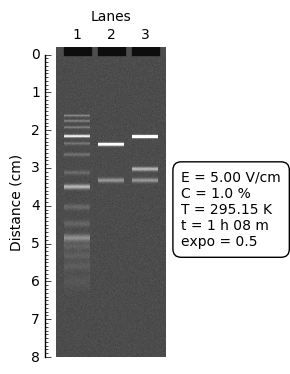

In [36]:
%matplotlib inline

from pydna.gel import weight_standard_sample

standard = weight_standard_sample('1kb+_GeneRuler')

pydna.Gel( [ standard, 
             pYPKpw.cut(PvuI),
             pYPKa_TDH3_FaPDC_TEF1.cut(PvuI) ] ).run()

The gel above shows that the empty vector (pYPKpw) is easily distinguishable from the expected
final construct by digestion with PvuI.